In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from lr_utils import load_dataset

%matplotlib inline

## Read the dataset

In [2]:
X_train_orig, Y_train, X_test_orig, Y_test, classes = load_dataset()

In [3]:
X_train_orig.shape

(209, 64, 64, 3)

## Show a sample

y = [1] it's a cat.


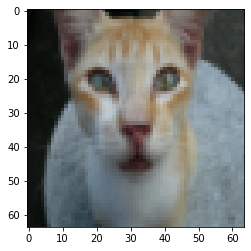

In [4]:
index = 11
plt.imshow(X_train_orig[index])
print('y = ' + str(Y_train[:,index]) + " it's a " + classes[np.squeeze(Y_train[:,index])].decode("utf-8") + ".")

## Describe the data

In [5]:
n = X_train_orig.shape[0] # m training examples
n_test = X_test_orig.shape[0] # m training e
num_px = X_train_orig.shape[1]


print('Training Data:\n'\
      +str(n)+' training examples\n'\
      +str(num_px)+'x'+str(num_px)+'x'+str(3)+' pixels picture\n\n'\
     'Test Data: \n'\
     +str(n_test)+' training examples\n')

Training Data:
209 training examples
64x64x3 pixels picture

Test Data: 
50 training examples



## Normalize the data

#### Transforming to a single vector

In [6]:
X_train = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test = X_test_orig.reshape(X_test_orig.shape[0], -1).T

In [7]:
print('Training data shape: '+str(X_train.shape)+'\nTest data shape: '+str(X_test.shape))

Training data shape: (12288, 209)
Test data shape: (12288, 50)


In [8]:
print ("sanity check after reshaping: " + str(X_train[0:5,0]))

sanity check after reshaping: [17 31 56 22 33]


#### Normalizing

In [9]:
X_train = X_train/255.
X_test = X_test/255.

## Model functions

In [10]:
def sigmoid(z):
    # sigmoid function
    return 1/(1 + np.exp(-z))

def initialize(dim):
    # Initializing dw, b = 0, 0
    dw = np.zeros(shape=(dim,1))
    b = 0
    return dw, b

def propagate(w, b, X, Y):
    m = X.shape[1]
    # Cost function and derivatives calculation
    A = sigmoid(np.dot(w.T, X)+b)
    cost = (-1/m)*(np.sum(Y*np.log(A)+(1-Y)*np.log(1-A)))
    
    dw = (1/m)*np.dot(X,(A-Y).T)
    db = (1/m)*np.sum(A-Y)
    
    grads = {'dw': dw,
            'db': db}
    
    return grads, cost

def optimize(w, b, X, Y, N_ITER, LEARNING_RATE, print_cost = False):
    costs = []
    for i in range(N_ITER):
        grads, cost = propagate(w, b, X, Y)
        dw = grads['dw']
        db = grads['db']
        
        # Gradient Descent
        w = w - LEARNING_RATE*dw
        b = b - LEARNING_RATE*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" %(i, cost))

        
    params = {'w':w,
             'b':b}
    
    grads = {'dw':dw,
            'db':db}
    
    return params, grads, costs

def predict(w, b, X):
    m = X.shape[1]
    predictions = np.zeros((m,1))
    A = sigmoid(np.dot(w.T, X)+b)
    
    for i in range(A.shape[1]):
        if A[0][i] > 0.5:
            predictions[i] = 1
        else:
            predictions[i] = 0
            
    return predictions

def model(X_train, Y_train, X_test, Y_test, N_ITER = 2000, LEARNING_RATE = 0.5, print_cost = False):
    w, b = initialize(X_train.shape[0])
    parameters, gradients, costs = optimize(w, b, X_train, Y_train, N_ITER, LEARNING_RATE, print_cost)
    w = parameters['w']
    b = parameters['b']
    
    Y_pred_train = predict(w,b,X_train)
    Y_pred_test = predict(w,b,X_test)
    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_pred_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_pred_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_pred": Y_pred_test, 
         "Y_pred" : Y_pred_train, 
         "w" : w, 
         "b" : b,
         "LEARNING_RATE" : LEARNING_RATE,
         "N_ITER": N_ITER}
    
    return d

In [11]:
#Test propagate
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


In [12]:
#Test optimize
params, grads, costs = optimize(w, b, X, Y, N_ITER = 100, LEARNING_RATE = 0.009, print_cost=False)
print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


In [13]:
#Test predictions
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1.]
 [1.]
 [0.]]


In [16]:
d = model(X_train, Y_train, X_test, Y_test, N_ITER = 2000, LEARNING_RATE = 0.005, print_cost = False)

train accuracy: 54.83619880497241 %
test accuracy: 51.92 %
